### Vilken linje klassificerar datan bäst?

Här nedan plottas alla 600 punkter, tillsammans med de fyra linjerna
> $p(x)=-1.5x+0.2$<br>
> $f(x)=-0.489x$<br>
> $g(x)=-2x+0.16$<br>
> $h(x)=800x-120$<br>

där $p(x)$ är min egen linje från första uppgiften. Eftersom punkterna (med några enstaka undantag) är tydligt uppdelade i två kluster, är det troligt att alla fyra linjerna kommer att ha hög träffsäkerhet när det gäller att klassificera punkterna.

Vi kan se att de tre linjerna med negativt _k_-värde åstadkommer nästan identisk klassificering av punkterna, medan linjen $h(x)$ har en delvis annan klassifcering av punkterna närmast _y_-axeln. Vi ska strax gå in på vilka ytterligare skillnader som kan finnas mellan de olika modellerna.

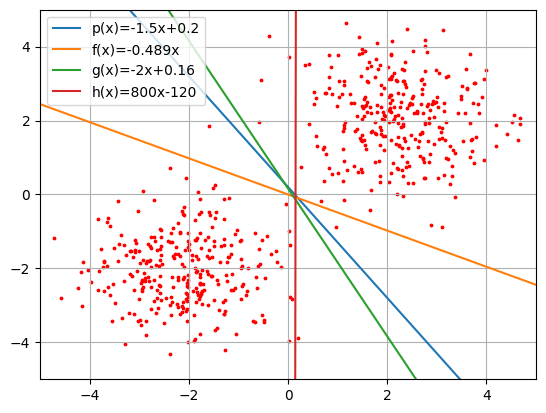

In [89]:
import numpy as np
import matplotlib.pyplot as plt

path1 = "unlabelled_data.csv"

k_values = [-1.5, -.489, -2, 800]
m_values = [.2, 0, .16, -120]

data_list=[]            # all points will be stored here

def read_unlabelled_data():
    with open(path1, "r") as data:
        for row in data:
            row_list=row.strip().split(",")
            data_list.append(row_list)

def plot_lines():
    x_values=np.linspace(-5,5,11)
    for j in range(4):
        k = k_values[j]
        m = m_values[j]
        y_values=[k * x + m for x in x_values]
        plt.plot(x_values, y_values)
    
def plot_points():
    x, y = [], []
    for j in data_list:
        x.append(float(j[0]))
        y.append(float(j[1]))
    plt.scatter(x, y, c="r", s=3)
    plt.grid()
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.legend(["p(x)=-1.5x+0.2", "f(x)=-0.489x", "g(x)=-2x+0.16", "h(x)=800x-120"])
    plt.show()

read_unlabelled_data()
plot_lines()
plot_points()


Vi ser här nedan att alla linjer utom $h(x)$ (den enda med positivt _k_-värde), sorterar punkterna med 299 st i klass 0, och 301 st i klass 1. $p(x)$ och $g(x)$ gör exakt samma uppdelning, medan $f(x)$ har två punkter som "bytt klass" med varandra, jämfört med $p(x)$ och $g(x)$.

Vi har inte kännedom om varje punkts korrekta klass, så vi kan inte avgöra hur träffsäker klassificeringen är, men med tanke på de tydliga klustren så är det rimligt att anta att alla modellerna har hög träffsäkerhet. Det är dock farligt att dra slutsatsen att "troligen har bara en enda punkt hamnat fel"; det kan lika gärna vara exempelvis sex 0:or som blivit felklassificerade som 1:or, och fem 1:or som blivit felklassificerade som 0:or, vilket i så fall skulle innebära att klustren delvis överlappar varandra.

In [110]:
import copy

line=[[0,0], [0,0], [0,0], [0,0]]

p_list=copy.deepcopy(data_list)
f_list=copy.deepcopy(data_list)
g_list=copy.deepcopy(data_list)
h_list=copy.deepcopy(data_list)

lists=[p_list, f_list, g_list, h_list]

n=0
for i in lists:
    for j in i:     # each datapoint is appended with 0 (left of line) or 1 (right of line)
        x=float(j[0])
        y=float(j[1])
        if (y>k[n] * x + m[n] and k[n]<0) or (y<k[n] * x + m[n] and k[n]>0):    # if line has positive slope, class "0" and class "1" are reversed
            j.append(1)
            line[n][1] += 1
        else:
            j.append(0)
            line[n][0] += 1     
    n+=1
line_names=["p(x)", "f(x)", "g(x)", "h(x)"]

for j in range(4):
    print(f"If we use line {line_names[j]}, {line[j][0]} points are classified as '0' and {line[j][1]} points are classified as '1'.")
print("\nThe complete classification lists are named p_list, f_list, g_list and h_list.")    

If we use line p(x), 299 points are classified as '0' and 301 points are classified as '1'.
If we use line f(x), 299 points are classified as '0' and 301 points are classified as '1'.
If we use line g(x), 299 points are classified as '0' and 301 points are classified as '1'.
If we use line h(x), 302 points are classified as '0' and 298 points are classified as '1'.

The complete classification lists are named p_list, f_list, g_list and h_list.
